In [35]:
f = open(".\\Dataset_Question1\\1\\1.pgm",'rb')

Realized that the first line contained P5 followed by the dimensions. Decided to store the dimensions in a List

In [36]:
dim = []
for i in f.readline().split():
    try:
        dim.append(int(i))
    except:
        continue
print(dim)

[64, 64, 255]


In [37]:
import numpy as np
img_matrix = np.ndarray(shape = (dim[1],dim[0]),dtype='int32')
for x in range(dim[1]):
    for y in range(dim[0]):
        img_matrix[x,y] = (ord(f.read(1)))

In [67]:
#display the image
import matplotlib.pyplot as plt
plt.imshow(img_matrix,cmap='Gray')

NameError: name 'img_matrix' is not defined

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def read_pgm(path,img_matrix):
    f = open(path,'rb')
    dim = []
    for i in f.readline().split():
        try:
            dim.append(int(i))
        except:
            continue
    img_matrix = np.ndarray(shape = (dim[1],dim[0]),dtype='int32')
    for x in range(dim[1]):
        for y in range(dim[0]):
            img_matrix[x,y] = (ord(f.read(1)))
    return img_matrix

[64, 64, 255]


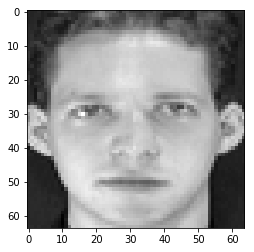

In [69]:
matrix1 = np.ndarray(shape = (1,1),dtype='int32')
matrix1 = read_pgm(".\\Dataset_Question1\\1\\1.pgm",matrix1)

In [15]:
matrix1

array([[48, 46, 47, ..., 53, 55, 53],
       [47, 45, 49, ..., 48, 49, 50],
       [46, 47, 48, ..., 37, 46, 51],
       ...,
       [48, 48, 49, ..., 47, 45, 48],
       [48, 49, 48, ..., 45, 46, 46],
       [50, 51, 47, ..., 44, 47, 46]])

In [3]:
u, s, vh = np.linalg.svd(matrix1, full_matrices=True)

In [70]:
u

array([[-0.06043686, -0.06042756,  0.020095  , ...,  0.01112226,
        -0.0231352 ,  0.05250808],
       [-0.06170776, -0.0409787 ,  0.07928644, ...,  0.02385447,
        -0.02558025, -0.03663428],
       [-0.06380965, -0.04848244,  0.04886572, ..., -0.09366373,
         0.02738657, -0.00913511],
       ...,
       [-0.12078667,  0.12749531,  0.1656775 , ...,  0.06252289,
         0.18923241, -0.08171646],
       [-0.11902588,  0.13004349,  0.15348926, ...,  0.09182911,
        -0.1535741 ,  0.09551922],
       [-0.1181822 ,  0.13738273,  0.16214472, ...,  0.03714871,
         0.09161545,  0.01887066]])

In [56]:
s.shape

(64,)

In [20]:
vh

array([[-0.06484754, -0.06754103, -0.06533266, ..., -0.06411243,
        -0.05995942, -0.05525207],
       [-0.17866737, -0.22589874, -0.22496537, ..., -0.23243387,
        -0.18188416, -0.13223914],
       [ 0.13364965,  0.17191416,  0.16677699, ...,  0.1357076 ,
         0.13203307,  0.11417074],
       ...,
       [ 0.02190459,  0.06611291, -0.00490006, ...,  0.02031739,
        -0.08027214,  0.03401242],
       [ 0.00874111, -0.00795575,  0.05492068, ..., -0.025446  ,
         0.02394296,  0.03182001],
       [ 0.07712903,  0.04916682, -0.05906216, ..., -0.08432886,
        -0.04998374,  0.00929623]])

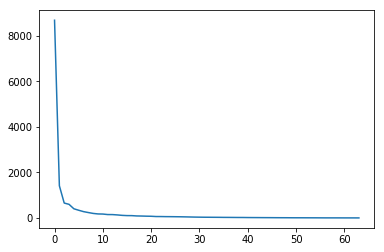

In [36]:
plt.plot(s)

So only less than 10 singular values actually matter to reconstruct the matrix, we can consider the rest to be just noise.

In [87]:
total = np.sum(s)
turn_pt = 0
i = 0
while turn_pt <= 0.94*total:
    turn_pt = turn_pt + s[i]
    i += 1
i

21

After running through a lot of percentages and checking the change in i, I concluded that 94% is a good cut off point

In [52]:
stopping_point = i + 1

In [90]:
reduced_matrix = np.zeros(shape = (64,64),dtype='float32') 
for i in range(21):
    for j in range(64):
        for k in range(64):
            reduced_matrix[j,k] = reduced_matrix[j,k] + (s[i])*u[j,i]*(vh[i,k])
print(reduced_matrix.shape)
reduced_matrix

(64, 64)


array([[49.253918, 48.157795, 45.976593, ..., 53.669556, 54.40552 ,
        51.78533 ],
       [44.10497 , 43.19441 , 47.863712, ..., 46.546745, 50.35597 ,
        51.718525],
       [48.342125, 42.113045, 48.23709 , ..., 36.37058 , 47.252934,
        51.23887 ],
       ...,
       [48.102943, 45.36279 , 45.702106, ..., 48.084667, 46.873497,
        48.59398 ],
       [47.18846 , 46.315926, 51.93912 , ..., 46.916813, 44.91999 ,
        46.523514],
       [50.09043 , 50.494797, 53.175064, ..., 46.973793, 42.853516,
        45.117626]], dtype=float32)

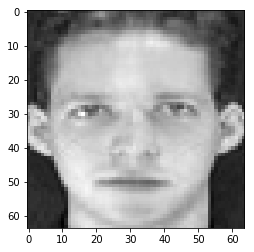

In [95]:
plt.imshow(reduced_matrix,cmap='gray')

In [ ]:
# plot images with different number of components
comps = [1, 5, 10, 15, 20, 25 ]

plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ vh[:comps[i], :]
    plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

In [104]:
def matrix_reduction(img_matrix):
    u, s, vh = np.linalg.svd(img_matrix)
    total = sum(s)
    partial_sum = 0
    i = 0
    while partial_sum < 0.75*total:
        partial_sum += s[i]
        i += 1
    elbow = i
    reduced_matrix = np.ndarray(shape = (64,64), dtype = 'float32')
    reduced_matrix = u[:,:elbow+1] @ np.diag(s[:elbow+1]) @vh[:elbow+1,:] 
    return reduced_matrix

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
for i in range(10):
    matrix = np.ndarray(shape=(0,0), dtype = 'float32')
    matrix = read_pgm('.\\Dataset_Question1\\1\\'+str(i+1)+'.pgm',matrix)
    plt.subplot(5,2,i+1)

<b> Forming the Representative image </b>

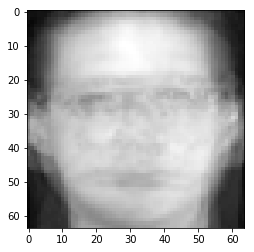

In [73]:
rep_image = np.zeros(shape=(64,64), dtype = 'float32')
for i in range(10):
    matrix = np.ndarray(shape=(64,64), dtype = 'float32')
    matrix = read_pgm('.\\Dataset_Question1\\1\\'+str(i+1)+'.pgm',matrix)
    reduced_matrix = matrix_reduction(matrix)
    rep_image = rep_image + reduced_matrix/10 #Giving equal weightage to each image
plt.imshow(rep_image,cmap='gray')

647.8968879308039
671.8873773470503
684.7503193785469
733.9054713763365
747.5683311753224
683.7554938581422
809.9910280234549
750.2088304653754
725.3484567378092
849.9692847991931


array([[ 74.44300175,  77.62037175,  84.15458207, ...,  70.83797006,
         71.31729642,  69.98761211],
       [ 77.44941084,  78.31481548,  83.52189824, ...,  73.44315899,
         72.82215587,  71.74224142],
       [ 78.03849909,  79.21021801,  82.91098704, ...,  75.89113626,
         74.4168254 ,  73.94193302],
       ...,
       [173.54120113, 181.83911992, 195.70902859, ...,  52.15978116,
         54.86213025,  56.89535914],
       [179.30556065, 190.28476571, 200.76054402, ...,  60.31730147,
         59.40543049,  59.46779951],
       [178.33442152, 191.0972183 , 199.36739285, ...,  75.31753271,
         72.27803804,  70.27796908]])

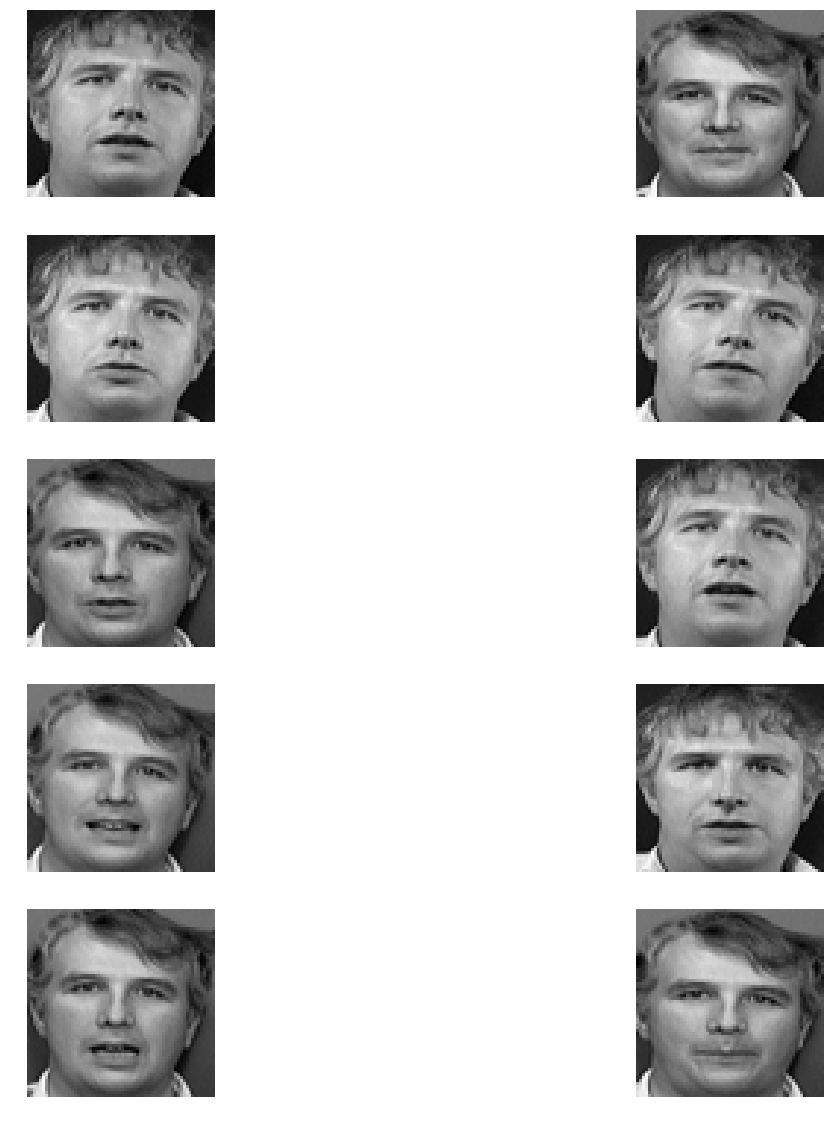

In [105]:
rep_image = np.zeros(shape=(64,64), dtype = 'float32')
plt.figure(figsize=(20,20))
for i in range(10):
    matrix = np.ndarray(shape=(64,64), dtype = 'float32')
    matrix = read_pgm('.\\Dataset_Question1\\7\\'+str(i+1)+'.pgm',matrix)
    plt.subplot(5,2,i+1)
    plt.axis('off')
    plt.imshow(matrix,'gray')
    reduced_matrix = matrix_reduction(matrix)
    print(np.linalg.norm(matrix-reduced_matrix,1))
    rep_image = rep_image + reduced_matrix/10 #Giving equal weightage to each image
rep_image

In [97]:
matrix = read_pgm('.\\Dataset_Question1\\7\\1.pgm',matrix)
matrix

array([[ 37,  38,  38, ...,  38,  36,  37],
       [ 39,  39,  39, ...,  38,  36,  36],
       [ 41,  38,  40, ...,  38,  37,  36],
       ...,
       [200, 202, 198, ...,  35,  35,  35],
       [194, 199, 206, ...,  36,  35,  35],
       [189, 204, 212, ...,  36,  35,  37]])

In [106]:
rep_images = np.zeros(shape=(15,64,64),dtype='float32')
for img_id in range (15):
    for i in range(10):
        rep_image = np.zeros(shape=(64,64), dtype = 'float32')
        matrix = np.ndarray(shape=(64,64), dtype = 'float32')
        matrix = read_pgm('.\\Dataset_Question1\\'+str(img_id + 1)+'\\'+str(i+1)+'.pgm',matrix)
        reduced_matrix = matrix_reduction(matrix)
        rep_image = rep_image + reduced_matrix/10 #Giving equal weightage to each image
    rep_images[img_id] = rep_image

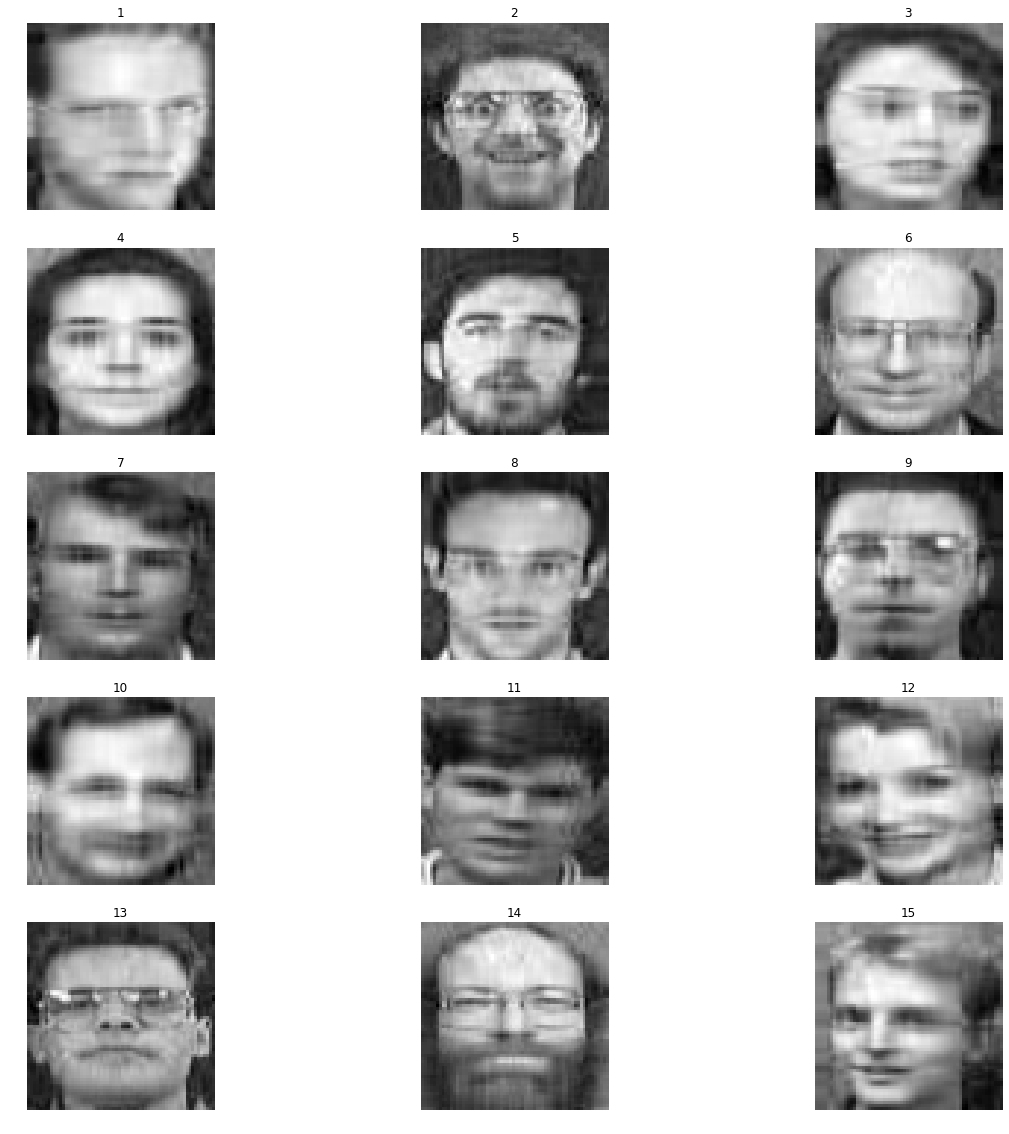

In [107]:
plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.axis('off')
    plt.title(i+1)
    plt.imshow(rep_images[i],cmap='gray')

In [110]:
import time
correct_predictions = 0
for i in range(15):
    for j in range(10):
        matrix = np.ndarray(shape=(64,64), dtype = 'float32')
        matrix = read_pgm('.\\Dataset_Question1\\'+str(i + 1)+'\\'+str(j+1)+'.pgm',matrix)
        match = 1
        #image_distance = np.linalg.norm(matrix-rep_images[0],1)
        minimum = np.linalg.norm(matrix-rep_images[0],1)
        #minimum = 10**9
        for img_id in range(15):
            image_distance = np.linalg.norm(matrix-rep_images[img_id],1)
            if minimum > image_distance:
                match = img_id + 1
                minimum = image_distance
        if match == i + 1:
            correct_predictions += 1
        print(match)
accuracy = (correct_predictions/150)*100
print("Accuracy =")
print(accuracy)

1
3
3
1
1
3
1
1
1
1
6
3
3
2
1
3
3
3
6
2
3
3
1
3
1
1
3
1
1
3
1
1
1
1
6
3
1
1
3
1
3
3
3
3
3
3
3
3
3
3
1
6
3
3
1
6
3
3
1
6
3
3
3
3
3
3
3
3
3
3
1
4
1
1
1
1
1
3
1
1
9
9
9
9
9
9
9
3
3
9
1
3
1
3
3
3
6
3
6
1
9
10
3
10
1
12
4
3
1
10
6
1
3
1
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
9
1
9
3
3
1
3
1
1
1
1
1
9
6
4
3
1
6
3
Accuracy =
16.666666666666664


In [84]:
rep_images[1]

array([[6.7238755, 6.970751 , 6.867825 , ..., 7.4737463, 7.4421353,
        7.3390665],
       [6.834628 , 6.7113853, 6.983979 , ..., 7.5211716, 7.752236 ,
        7.7739906],
       [6.915908 , 6.8681517, 7.0979805, ..., 7.704196 , 7.760833 ,
        7.9923606],
       ...,
       [5.185955 , 5.194565 , 5.115501 , ..., 7.195038 , 7.3330245,
        7.668601 ],
       [4.8775063, 5.140162 , 4.7484417, ..., 7.069824 , 7.068004 ,
        7.120634 ],
       [4.8668647, 5.0808983, 4.901856 , ..., 7.0055556, 7.3467164,
        7.036903 ]], dtype=float32)

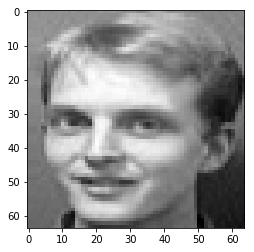

In [54]:
plt.imshow((rep_images[14]),'gray')

In [51]:
matrix-rep_images[14]

array([[111.70948315, 112.70448017, 113.80377769, ..., 105.35342884,
        106.22802734, 102.16413784],
       [112.5158987 , 112.55153465, 113.46573162, ..., 104.71163559,
        105.24230576, 103.19910049],
       [113.32128716, 112.39327431, 112.28533745, ..., 106.11254597,
        105.40074444, 103.64147758],
       ...,
       [ 85.62242985,  84.76464081,  84.64107323, ...,  32.73032141,
         32.10669279,  31.72802591],
       [ 84.80736637,  81.85077381,  83.78753567, ...,  31.84251499,
         28.68866777,  31.57430792],
       [ 81.854249  ,  82.77927876,  82.75729942, ...,  29.38239217,
         32.21325231,  30.37748265]])

In [52]:
matrix


array([[124, 125, 126, ..., 117, 118, 114],
       [125, 125, 126, ..., 116, 117, 115],
       [126, 125, 125, ..., 118, 117, 115],
       ...,
       [ 95,  94,  94, ...,  36,  36,  35],
       [ 94,  91,  93, ...,  35,  32,  35],
       [ 91,  92,  92, ...,  33,  35,  34]])

In [53]:
rep_images[14]

array([[12.290517 , 12.29552  , 12.196222 , ..., 11.646571 , 11.771973 ,
        11.835862 ],
       [12.484101 , 12.448465 , 12.534268 , ..., 11.288364 , 11.757694 ,
        11.8008995],
       [12.678713 , 12.606726 , 12.714663 , ..., 11.887454 , 11.599256 ,
        11.358522 ],
       ...,
       [ 9.37757  ,  9.235359 ,  9.358927 , ...,  3.2696786,  3.8933072,
         3.271974 ],
       [ 9.192634 ,  9.149226 ,  9.212464 , ...,  3.157485 ,  3.3113322,
         3.425692 ],
       [ 9.145751 ,  9.220721 ,  9.242701 , ...,  3.6176078,  2.7867477,
         3.6225173]], dtype=float32)